# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

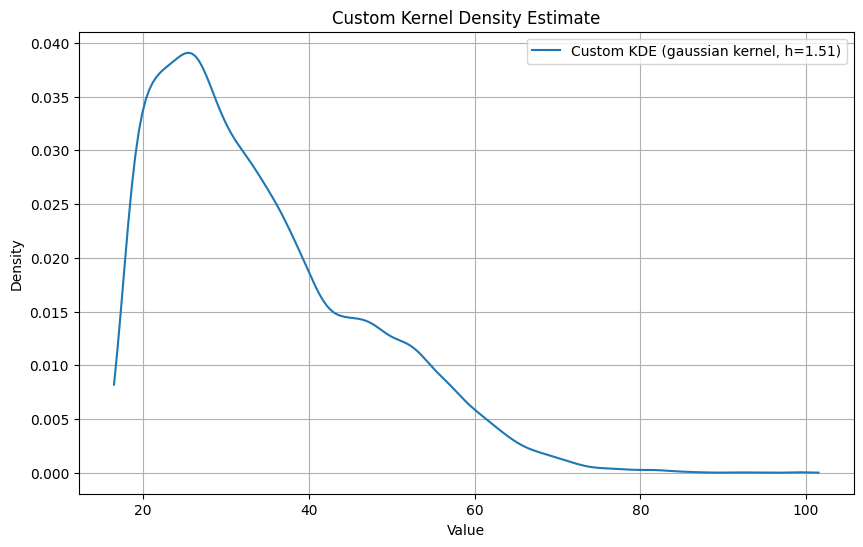

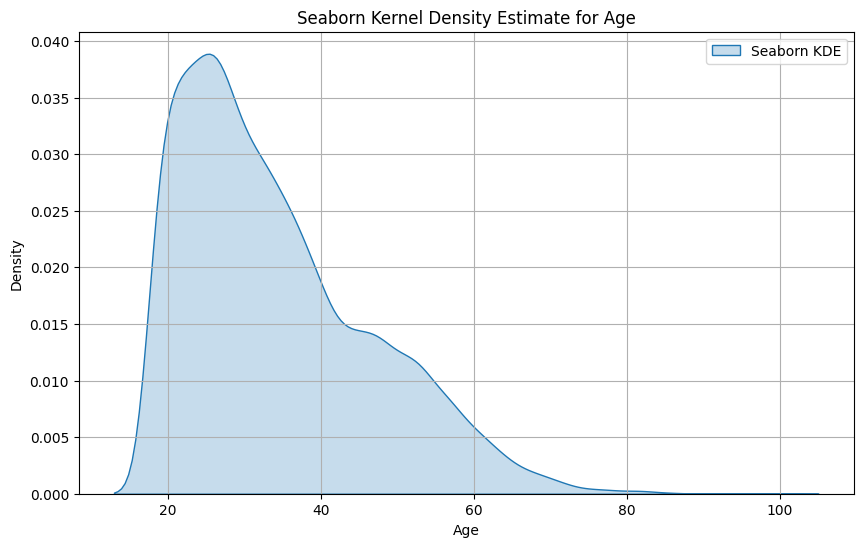

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, cdist


#Calculating Silverman's rule of thumb bandwidth
def silverman_bandwidth(data):
  n = len(data)
  iqr = np.percentile(data, 75) - np.percentile(data, 25)
  std_dev = np.std(data)
  A = min(std_dev, iqr / 1.34)
  bandwidth = 0.9 * A * (n ** -0.2)
  return bandwidth

#Creating custom Kernel Density Plot function
def custom_kdeplot(data, kernel='gaussian', bandwidth='silverman'):

  if not isinstance(data, (pd.Series, np.ndarray)):
    raise ValueError("Input data must be a Pandas Series or Numpy array.")

  data = np.asarray(data)
  n = len(data)

  if bandwidth == 'silverman':
    h = silverman_bandwidth(data)
  else:
    h = bandwidth

  #Creating a range of points to evaluate the KDE
  x_min, x_max = data.min() - h, data.max() + h
  x = np.linspace(x_min, x_max, 200) # Increased resolution for smoother plot

  #Broadcasting!!!
  z = (x[:, None] - data) / h

  #Calculating the kernel density estimate
  if kernel == 'gaussian':
    # Gaussian kernel function
    kde = np.sum((1 / np.sqrt(2 * np.pi)) * np.exp(-z**2 / 2), axis=1) / (n * h)
  elif kernel == 'uniform':
    # Uniform/Bump kernel function
    kde = np.sum(0.5 * ((np.abs(z) <= 1).astype(float)), axis=1) / (n * h)
  elif kernel == 'epanechnikov':
    # Epanechnikov kernel function
    kde = np.sum(0.75 * (1 - z**2) * ((np.abs(z) <= 1).astype(float)), axis=1) / (n * h)
  else:
    raise ValueError("Invalid kernel type. Choose from 'gaussian', 'uniform', or 'epanechnikov'.")


  plt.figure(figsize=(10, 6))
  plt.plot(x, kde, label=f'Custom KDE ({kernel} kernel, h={h:.2f})')
  plt.xlabel('Value')
  plt.ylabel('Density')
  plt.title('Custom Kernel Density Estimate')
  plt.legend()
  plt.grid(True)


#Loading the pretrial data
try:
    pretrial_df = pd.read_csv('/content/pretrial_data.csv')
except FileNotFoundError:
    print("pretrial_data.csv not found. Please make sure it's in the correct directory.")
    pretrial_df = None

if pretrial_df is not None:
    # Example usage with pretrial data (using 'Age' column as an example)
    custom_kdeplot(pretrial_df['age'].dropna())

    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=pretrial_df, x='age', fill=True, label='Seaborn KDE') # Corrected column name to 'age'
    plt.title('Seaborn Kernel Density Estimate for Age')
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?